In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Load bug occurrence data
bug_df = pd.read_excel('logs_clean_new.xlsx')

# Load course data
course_df = pd.read_excel('full_list_lab.xlsx')

In [3]:
bug_null_values = bug_df['log_timestamp'].isnull().sum()
print("Number of null values in bug_df merge key column:", bug_null_values)

bug_df = bug_df.dropna(subset=['log_timestamp'])

Number of null values in bug_df merge key column: 4591


In [4]:
# Convert timestamp format in bug occurrence data
bug_df['timestamp'] = pd.to_datetime(bug_df['log_timestamp'], format='%Y-%m-%dT%H:%M:%S')

# Convert timestamp format in course data
course_df['timestamp'] = pd.to_datetime(course_df['End'], format='%Y-%m-%dT%H:%M:%S')

In [5]:
# Convert timestamp format in bug_df and remove milliseconds
bug_df['timestamp'] = pd.to_datetime(bug_df['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')
bug_df['timestamp'] = pd.to_datetime(bug_df['timestamp']).astype(np.int64)

# Convert timestamp format in course_df
course_df['timestamp'] = pd.to_datetime(course_df['timestamp'], format='%Y-%m-%d %H:%M:%S').astype(np.int64)

/tmp/ipykernel_483/4135522947.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  bug_df['timestamp'] = pd.to_datetime(bug_df['timestamp']).astype(np.int64)
/tmp/ipykernel_483/4135522947.py:6: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  course_df['timestamp'] = pd.to_datetime(course_df['timestamp'], format='%Y-%m-%d %H:%M:%S').astype(np.int64)


In [6]:
bug_df['timestamp'] = pd.to_datetime(bug_df['timestamp'])
course_df['timestamp'] = pd.to_datetime(course_df['timestamp'])
bug_df = bug_df.sort_values('timestamp')
course_df = course_df.sort_values('timestamp')
time_window = pd.to_timedelta('1 hour')
merged_df = pd.merge_asof(bug_df, course_df, on='timestamp', direction='nearest', tolerance=time_window)
merged_df = merged_df.rename(columns={'log_msg;;;;;;;;;;;;;;;': 'log_msg'})

In [7]:
# Handle NaNs
merged_df['Type'].fillna(-1, inplace=True)

# Convert 'Type' column to rounded integers
merged_df['Type'] = merged_df['Type'].astype(int)

# Convert 'log_code' column to rounded integers
merged_df['log_code'] = merged_df['log_code'].astype(int)

# Convert back (avoids bugs)
merged_df['Type'] = merged_df['Type'].replace(-1, 0)

In [8]:
# Save merged_df as Excel file
merged_df.to_excel('holy_grail2.xlsx', index=False)

In [9]:
# Create a contingency table
contingency_table = pd.crosstab(merged_df['Type'], merged_df['log_code'])

# Perform chi-square test for independence
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square test p-value:", p_value)

Contingency Table:
log_code  43    61    70    85    104   121   148   167   173    181   ...  \
Type                                                                   ...   
0           15    27     5    30    38     5     5    30     4  33453  ...   
1           22    62     5    42    99     4    13    23    57  27750  ...   

log_code  2463  2475  2483  2500  2628  2664  2666  2679  2739  2827  
Type                                                                  
0            3     3     3     3     5     5     5     5     5     3  
1            4     4     4     4     4     4     4     4     4     4  

[2 rows x 73 columns]

Chi-Square test p-value: 0.0


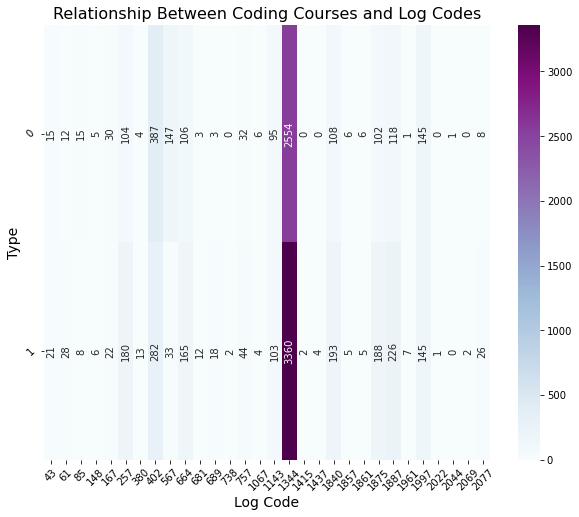

In [10]:
# Select specific log_code values to include in the heatmap
selected_log_codes = [43.0, 757.0, 402.0, 1875.0, 1887.0, 1840.0, 1344.0, 380.0, 567.0, 681.0,
                      1997.0, 689.0, 1961.0, 2044.0, 257.0, 664.0, 61.0, 85.0, 1143.0, 2077.0,
                      167.0, 1067.0, 2022.0, 1857.0, 1861.0, 738.0, 2069.0, 148.0, 1415.0, 1437.0]

# Filter the merged_df DataFrame based on the selected log_code values and log_msg condition
filtered_df = merged_df[(merged_df['log_code'].isin(selected_log_codes)) & (merged_df['log_msg'].str.contains("st"))]

# Create a contingency table for the filtered DataFrame
contingency_table = pd.crosstab(filtered_df['Type'], filtered_df['log_code'])

# Generate a heatmap with rotated values and legends
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='BuPu', annot_kws={"rotation": 90},
            xticklabels=True, yticklabels=True)

# Rotate the x-axis and y-axis labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.title('Relationship Between Coding Courses and Log Codes', fontsize=16)

plt.xlabel('Log Code', fontsize=14)
plt.ylabel('Type', fontsize=14)
plt.savefig('heatmap1.png', dpi=300, bbox_inches='tight')

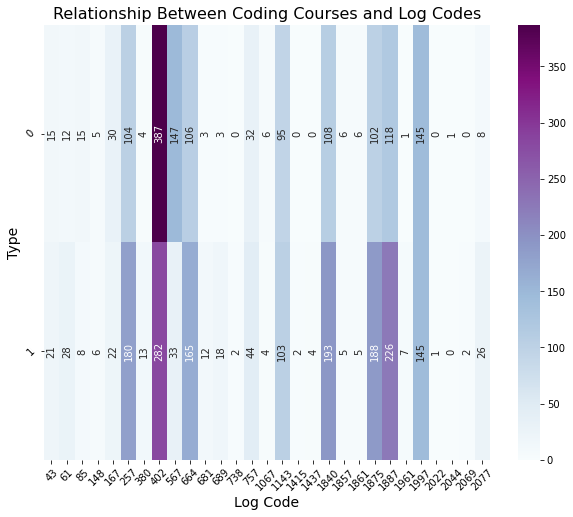

In [11]:
# Select specific log_code values to include in the heatmap
selected_log_codes = [43.0, 757.0, 402.0, 1875.0, 1887.0, 1840.0, 380.0, 567.0, 681.0,
                      1997.0, 689.0, 1961.0, 2044.0, 257.0, 664.0, 61.0, 85.0, 1143.0, 2077.0,
                      167.0, 1067.0, 2022.0, 1857.0, 1861.0, 738.0, 2069.0, 148.0, 1415.0, 1437.0]

# Filter the merged_df DataFrame based on the selected log_code values and log_msg condition
filtered_df = merged_df[(merged_df['log_code'].isin(selected_log_codes)) & (merged_df['log_msg'].str.contains("st"))]

# Create a contingency table for the filtered DataFrame
contingency_table = pd.crosstab(filtered_df['Type'], filtered_df['log_code'])

# Generate a heatmap with rotated values and legends
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='BuPu', annot_kws={"rotation": 90},
            xticklabels=True, yticklabels=True)

# Rotate the x-axis and y-axis labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.title('Relationship Between Coding Courses and Log Codes', fontsize=16)

plt.xlabel('Log Code', fontsize=14)
plt.ylabel('Type', fontsize=14)
plt.savefig('heatmap2.png', dpi=300, bbox_inches='tight')